In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager
warnings.filterwarnings(action='ignore')
%matplotlib inline

font_name='/Library/Fonts/Arial Unicode.ttf'
font_family=font_manager.FontProperties(fname=font_name).get_name()
plt.rcParams['font.family']=font_family


# EDA_자동차가격예측데이터.txt 보면서 하기
### 자동차 가격 예측 데이터 ###

* 데이터의 논리적 구조(train.csv(학습용))
- ID : 샘플 별 고유 id
- 생산년도 : 차량이 생산된 연도
- 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
- 브랜드
- 차량모델명
- 판매도시 : 3글자로 인코딩된 도시 이름
- 판매구역 : 3글자로 인코딩된 구역 이름
- 주행거리 : 총 주행 거리(km)
- 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
- 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
- 경유 : 경유 자동차 여부
- 가솔린 : 가솔린 자동차 여부
- 하이브리드 : 하이브리드 자동차 여부
- 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
- 가격 : 자동차 가격(백만원)

* EDA 수행 내용
- train 데이터를 데이터프레임으로 로드
- 피처와 타깃 추출데이터 정보 확인
- 기술통계량 확인
- 결측치 확인
- 중복값 확인
- 중복값 제거
- 이상치 확인을 위한 데이터 시각화 - boxplot
- 이상치 조회 (주행거리가 80만km 이상인 데이터)
- 이상치 제거
- 생산년도, 모델출시년도에 따른 가격 분포 시각화 - barplot(막대그래프)
- 브랜드별 차량 대수 시각화 (상위 10개 조회) - barplot(막대그래프)
- 판매도시 개수
- 판매구역 개수
- 주행거리가 100km 미만인 데이터 조회
- 주행거리가 100km 미만인 데이터와 가격과의 상관관계 시각화 - scatterplot
- 주행거리가 20km 미만이면서 가격이 2000만원 미만인 데이터 조회
- 주행거리가 20km 미만이면서 가격이 2000만원 미만인 데이터 삭제
- 데이터 시각화 (가격의 분포) - distplot
- 변수 간의 상관관계 시각화 - heatmap
- 훈련 데이터의 인덱스 초기화(리셋)
- 분석에 불필요한 ID 컬럼 삭제
- 피처와 타깃('가격') 추출

In [3]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


In [4]:
# feature 과 타깃 추출데이터 정보 확인

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [5]:
# 기술통계량 확인

train_df.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [6]:
train_df.describe(include = 'all')

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920,57920.000000,57920.000000,57920,57920,57920,57920,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
unique,57920,NaN,NaN,20,143,3224,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TRAIN_00000,NaN,NaN,opel,astra,WAR,MAZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,6651,2537,3245,10846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.355352,2008.033408,NaN,NaN,NaN,NaN,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,NaN,5.174108,5.087963,NaN,NaN,NaN,NaN,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,NaN,1978.000000,1983.000000,NaN,NaN,NaN,NaN,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,NaN,2008.000000,2004.000000,NaN,NaN,NaN,NaN,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,NaN,2011.000000,2008.000000,NaN,NaN,NaN,NaN,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,NaN,2016.000000,2012.000000,NaN,NaN,NaN,NaN,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000


In [38]:
#결측치 확인

train_df.isnull().sum()

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

In [39]:
#결측치 확인2

train_df.isnull().sum().sum()

0

In [41]:
#중복값 확인

duplicated_cols=train_df.columns[1:]
print(f'ID를 제외한 중복된 값은{train_df.duplicated(subset=duplicated_cols).sum()}개 ')

duplicated_data=train_df.duplicated(subset=duplicated_cols)
train_df[duplicated_data]

ID를 제외한 중복된 값은2개 


,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
17111,TRAIN_17111,2016,2015,hyundai,tucson,WYI,MAL,115000,1685,0,1,0,0,0,97.37
38566,TRAIN_38566,2015,2014,hyundai,i20,MUD,POD,159500,1396,0,1,0,0,0,47.97


In [42]:
# 중복값 제거

duplicated_index = duplicated_data[duplicated_data].index
train_df.drop(duplicated_index, axis=0, inplace=True)

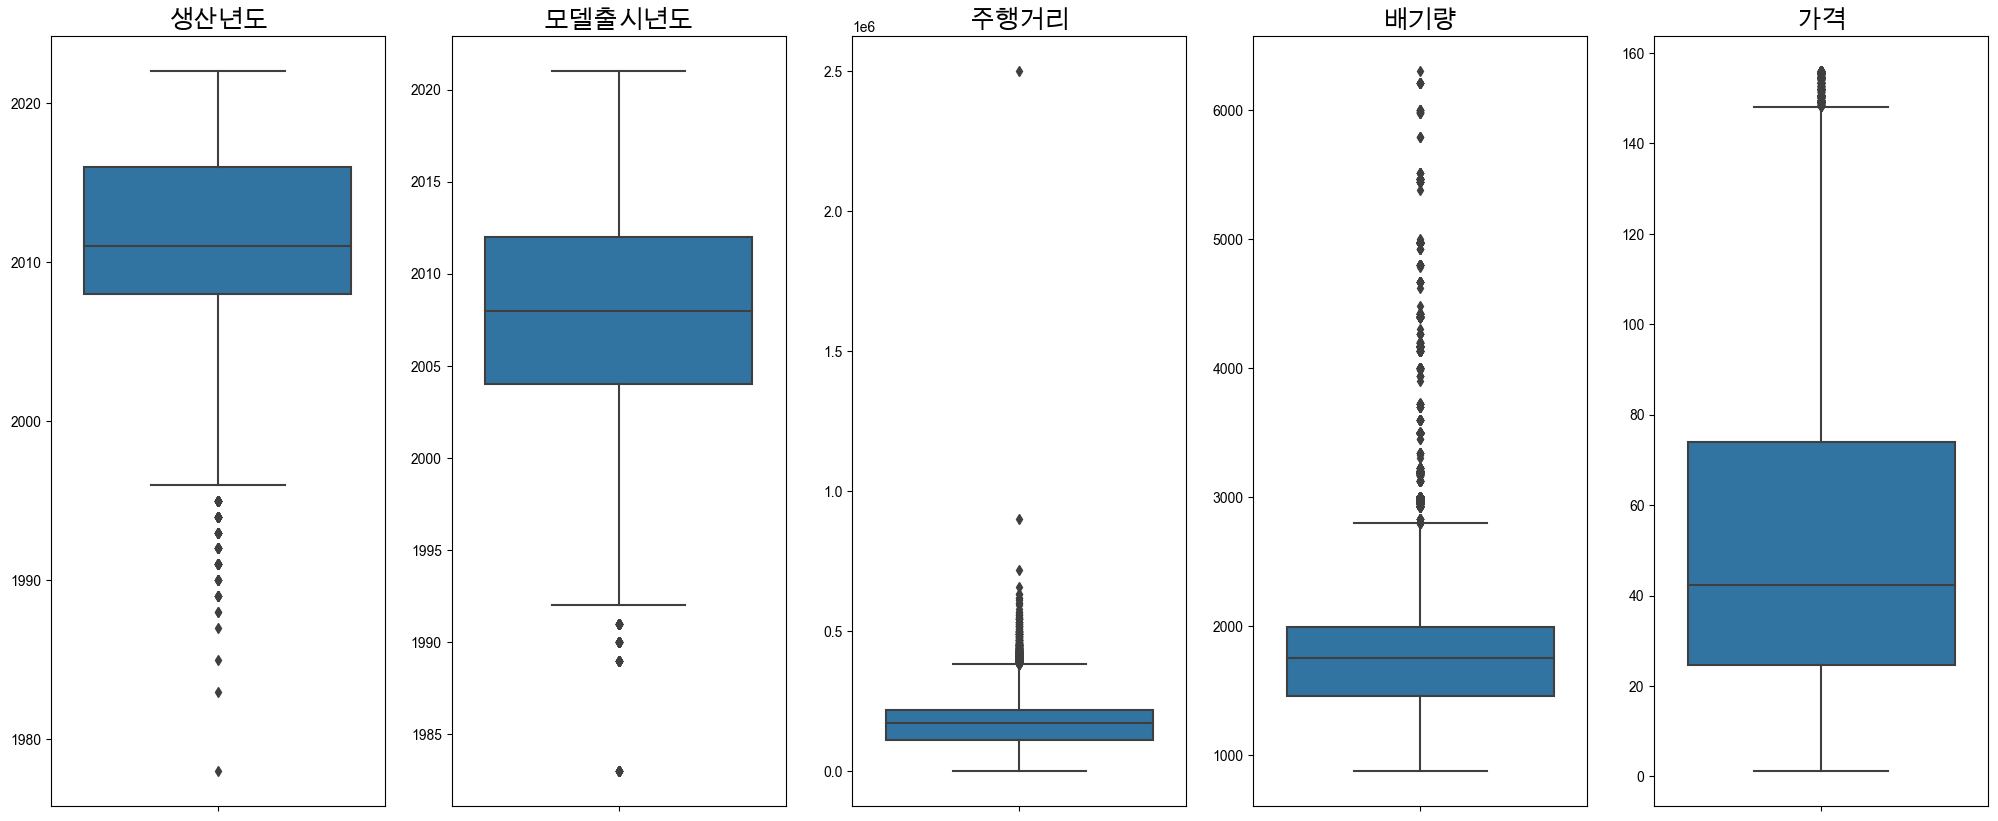

In [45]:
# 이상치 확인을 위한 데이터 시각화 - boxplot

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=5)
variables=['생산년도', '모델출시년도', '주행거리', '배기량', '가격']
for i , variable in enumerate(variables):
    sns.boxplot(y=variable, data=train_df, ax=axs[i])
    axs[i].set_ylabel('')
    axs[i].set_title(variable, size=18)
plt.show()

In [46]:
# 이상치 조회(주행거리가 80만 이상인 데이터)

selected_rows = train_df['주행거리']>800000
train_df[selected_rows]

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
40808,TRAIN_40808,2014,2014,ford,mondeo,POZ,LUB,2500000,1999,0,0,0,1,0,30.94
57668,TRAIN_57668,2017,2014,mercedes-benz,vito,PIL,WIE,900000,2143,0,1,0,0,0,87.94


In [49]:
# 이상치 제거

train_df.drop(train_df[selected_rows].index, axis=0, inplace = True)
train_df.shape

(57916, 15)

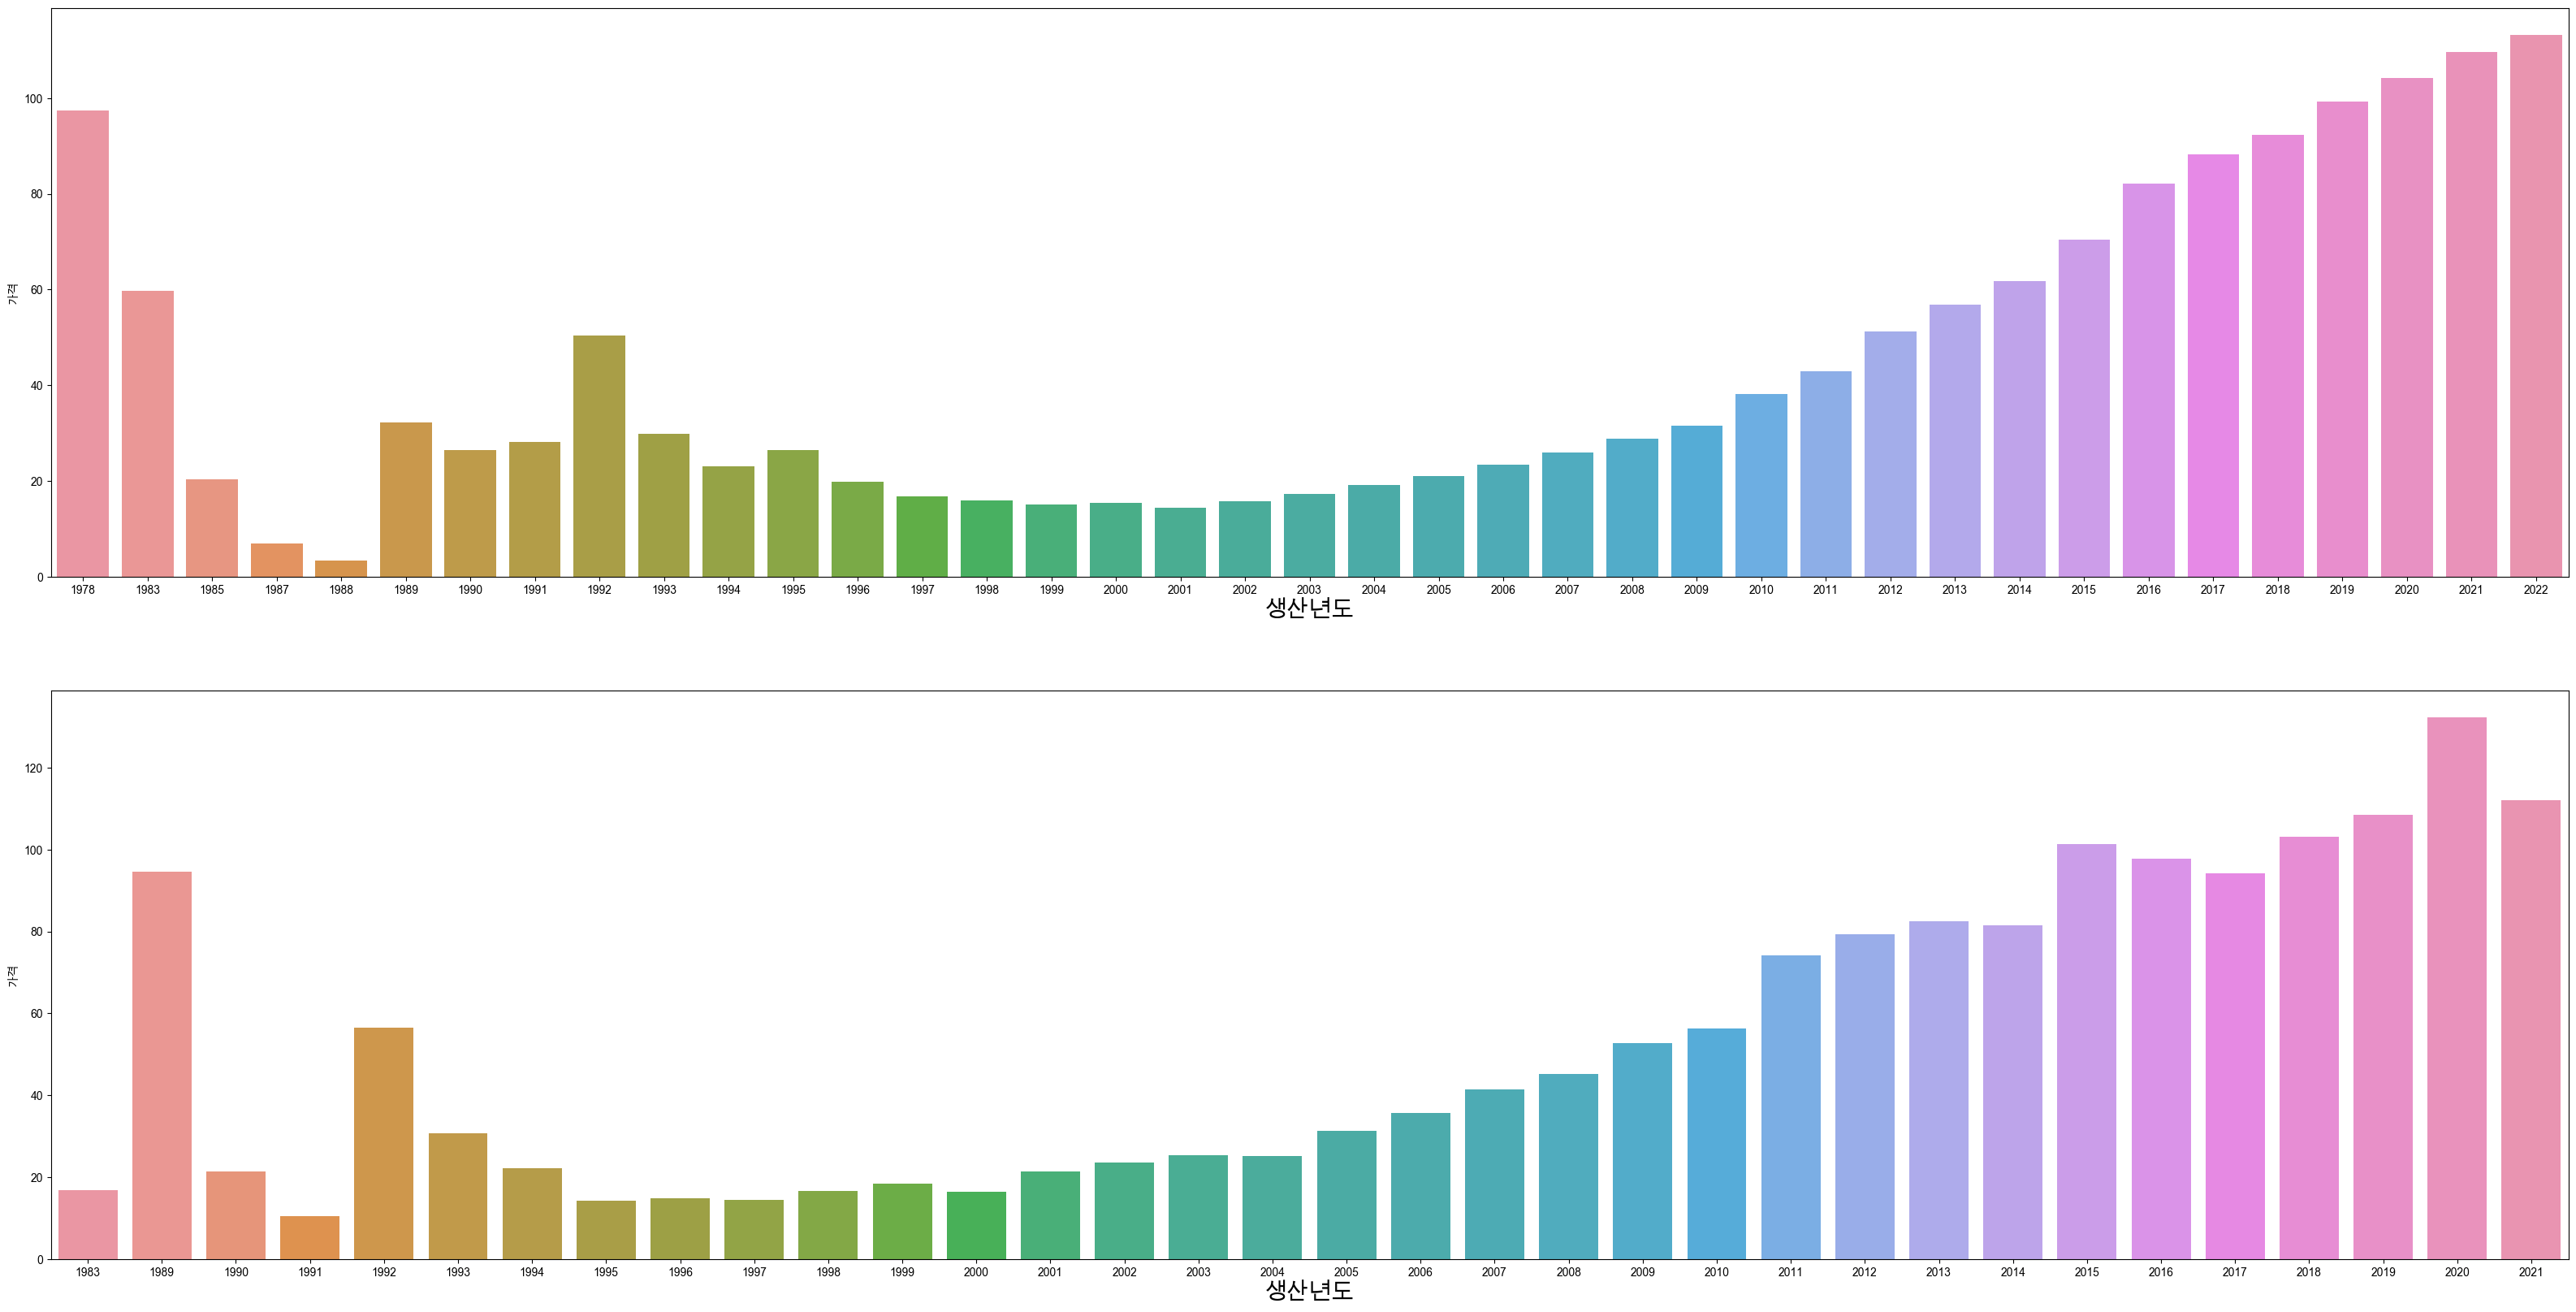

In [52]:
# 생산년도, 모델출시년도에 따른 가격 분포 시각화 - barplot

fig, axs = plt.subplots(figsize=(40,20), nrows=2, ncols=1)

sns.barplot(x=train_df['생산년도'], y=train_df['가격'], errorbar=None, ax=axs[0])
axs[0].set_xlabel('생산년도', size=20)

sns.barplot(x=train_df['모델출시년도'], y=train_df['가격'], errorbar=None, ax=axs[1])
axs[1].set_xlabel('생산년도', size=20)

plt.show()

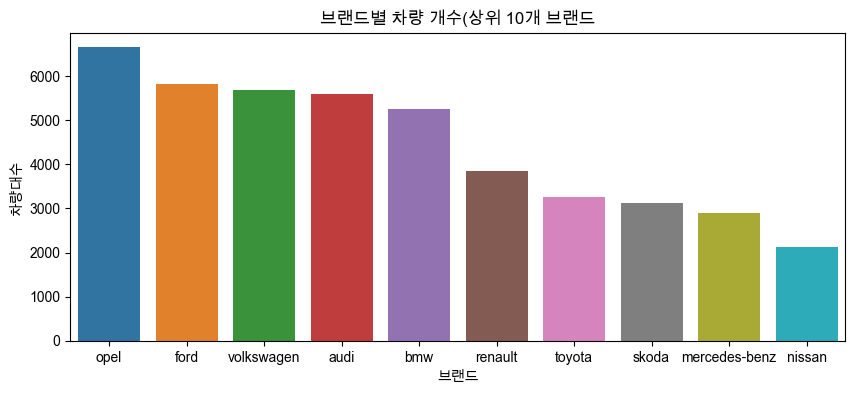

In [57]:
# 브랜드별 차량 대수 시각화(상위 10개 조회) - barplot(막대그래프)

plt.figure(figsize=(10,4))
top10_brand = train_df['브랜드'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=top10_brand.index, y=top10_brand.values)
plt.xlabel('브랜드')
plt.ylabel('차량대수')
plt.title('브랜드별 차량 개수(상위 10개 브랜드')
plt.show()

In [58]:
# 판매도시 개수

train_df['판매도시'].value_counts()

WAR    3245
KRA    1241
WRO    1166
LOD    1141
POZ     986
       ... 
MVH       1
CIB       1
CED       1
FNQ       1
ZDZ       1
Name: 판매도시, Length: 3224, dtype: int64

In [60]:
# 판매구역 개수

train_df['판매구역'].value_counts()

MAZ    10846
SLA     7655
WIE     6909
MAL     4745
DOL     4603
LOD     3581
POM     3517
KUJ     2628
LUB     2597
ZAC     2078
POD     1848
SWI     1789
WAR     1569
LUU     1427
POL     1066
OPO     1041
MOR       17
Name: 판매구역, dtype: int64

In [61]:
# 주행거리가 100km 미만인 데이터 조회

short_drive_df = train_df[train_df['주행거리']<100].sort_values(by='주행거리')
short_drive_df

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
29059,TRAIN_29059,2021,2015,audi,a4,ZHF,ZAC,1,1984,0,0,1,0,0,101.04
45445,TRAIN_45445,2021,2016,fiat,tipo,FMD,MAL,1,1368,0,0,1,0,0,73.84
14828,TRAIN_14828,2021,2019,opel,corsa,WAR,MAZ,1,1199,0,0,1,0,0,94.00
45462,TRAIN_45462,2021,2009,fiat,doblo,SWI,DOL,1,1598,0,1,0,0,0,137.15
45507,TRAIN_45507,2021,2015,hyundai,tucson,WVX,ZAC,1,1600,0,0,1,0,0,149.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18543,TRAIN_18543,2021,2019,toyota,corolla,WRO,DOL,20,1496,0,0,1,0,0,108.94
56350,TRAIN_56350,2022,2010,toyota,land-cruiser,KRA,MAL,50,2755,0,1,0,0,0,84.50
13863,TRAIN_13863,2022,2010,toyota,land-cruiser,KRA,MAL,50,3999,0,0,1,0,0,136.50
38997,TRAIN_38997,2021,2011,fiat,panda,LUB,LUB,80,999,0,0,1,0,0,73.84


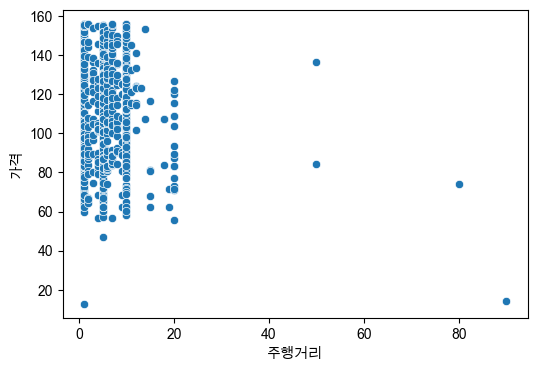

In [62]:
# 주행거리가 100km 미만인 데이터와 가격과의 상관관계 시각화 - scatterplot

plt.figure(figsize=(6,4))
sns.scatterplot(x=short_drive_df['주행거리'], y=short_drive_df['가격'])
plt.show()

In [65]:
# 주행거리가 20km 미만이면서 가격이 2000만원 미만인 데이터 조회

train_df[(train_df['주행거리'] < 20) & (train_df['가격']<20)]

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격


In [64]:
# 주행거리가 20km 미만이면서 가격이 2000만원 미만인 데이터 삭제

train_df.drop(train_df[(train_df['주행거리'] < 20) & (train_df['가격']<20)].index, axis=0, inplace=True)
train_df.shape

(57915, 15)

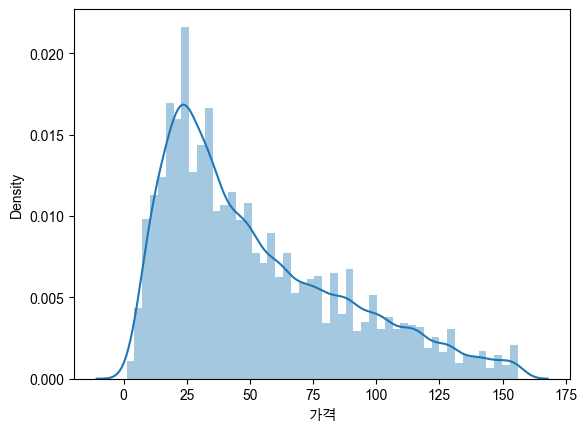

In [66]:
# 데이터 시각화(가격의 분포) -distplot

sns.distplot(train_df['가격'], kde=True)

plt.show()

<AxesSubplot:>

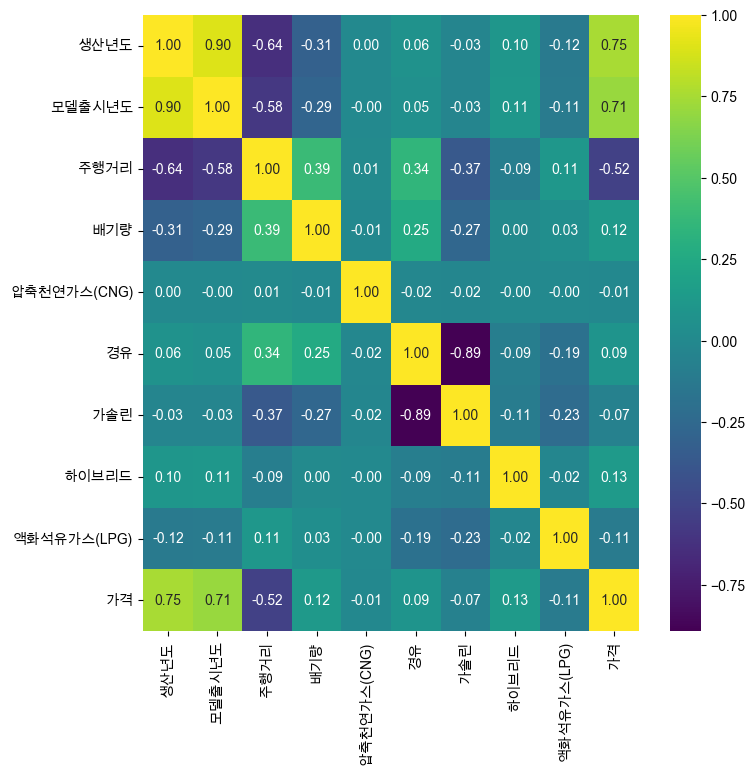

In [67]:
# 변수 간의 상관관계 시각화 - heatmap

plt.figure(figsize=(8,8))
sns.heatmap(train_df.corr(), annot=True, cmap='viridis', fmt='.2f')

In [68]:
# 훈련 데이터의 인덱스 초기화(리셋)

train_df.reset_index(drop=True, inplace =True)
train_df.tail()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
57910,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57911,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57912,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57913,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77
57914,TRAIN_57919,2005,2004,bmw,seria-1,EIX,SLA,144744,1596,0,0,1,0,0,19.50


In [69]:
# 분석에 불필요한 ID컬럼 삭제

train_df.drop('ID', axis=1, inplace = True)


In [70]:
train_df

,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57911,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57912,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57913,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


In [71]:
# 피처와 타깃 추출

train_X = train_df.drop('가격',axis=1 ,inplace = False)
y=train_df['가격']

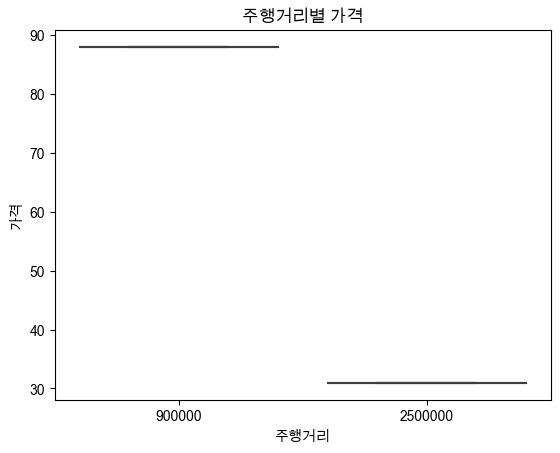

In [16]:
train_df1 = train_df.loc[train_df["주행거리"]>=800000] 
sns.boxplot(x="주행거리", y="가격", data=train_df1)
plt.title("주행거리별 가격") 
plt.show()

In [27]:

sns.barplot("브랜드", hue="sex", data=train_df["브랜드"].value_counts().head(10))
plt.title("요일 별, 성별 젂체 팁의 Histogram") 
plt.show()

TypeError: barplot() got multiple values for argument 'data'

In [29]:
len(train_df["판매도시"].value_counts())

3224

In [30]:
len(train_df["판매구역"].value_counts())

17

In [31]:
train_df.loc[train_df["주행거리"]<1000000]

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


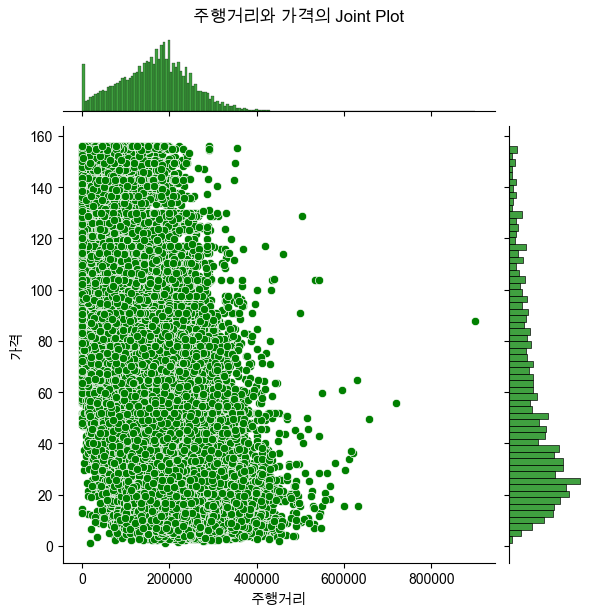

In [32]:
train_df_dist=train_df.loc[train_df["주행거리"]<1000000]
sns.jointplot(x="주행거리", y="가격", data=train_df_dist, kind='scatter', color='green')
plt.suptitle("주행거리와 가격의 Joint Plot", y=1.02)
plt.show()

In [35]:
train_df.loc[(train_df["주행거리"]<200000) & (train_df["가격"]<20)]

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
17,TRAIN_00017,2009,2001,volkswagen,polo,CHE,KUJ,189967,1198,0,0,1,0,0,17.42
21,TRAIN_00021,2003,1998,opel,astra,CHY,MAZ,137552,1598,0,0,1,0,0,12.87
25,TRAIN_00025,2005,2003,ford,c-max,JWZ,SWI,140000,1798,0,0,1,0,0,16.38
32,TRAIN_00032,2005,2004,ford,focus,MAR,WIE,187000,1596,0,0,1,0,0,19.11
36,TRAIN_00036,2007,2002,honda,jazz,LOM,POL,149000,1246,0,0,1,0,0,18.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57887,TRAIN_57887,2009,2006,opel,corsa,MOG,KUJ,124000,1364,0,0,1,0,0,19.37
57892,TRAIN_57892,2004,2001,honda,civic,XOK,ZAC,134000,1668,0,0,1,0,0,16.77
57908,TRAIN_57908,2007,2004,opel,astra,VIO,MAZ,189000,1910,0,1,0,0,0,14.95
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


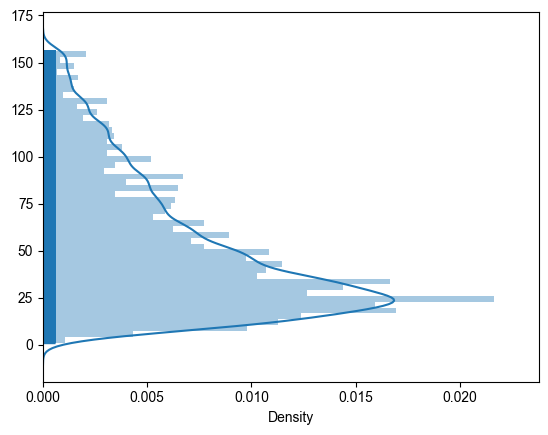

In [37]:
x = train_df.가격.values
sns.distplot(x, kde=True, rug=True, vertical=True)
plt.show()